In [76]:
"""
Title: Global Unemployment Trends (2014–2024)
Author: Mohammed Abdul Jilani
Student ID Number: 24168848
Module: Applied Data Science 1 – Statistics and Trends
Dataset: Kaggle – Global Unemployment Data
"""


'\nTitle: Global Unemployment Trends (2000–2023)\nAuthor: Mohammed Abdul Jilani\nStudent ID Number: 24168848\nModule: Applied Data Science 1 – Statistics and Trends\nDataset: Kaggle – Global Unemployment Data\n'

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from scipy.stats import skew, kurtosis

In [110]:
df = pd.read_csv("global_unemployment_data.csv")
df.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [111]:
print(df.columns)

Index(['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')


In [112]:
years = ['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']

In [113]:
usa = df[df['country_name']=='United States']
india = df[df['country_name']=='India']
china = df[df['country_name']=='China']
brazil = df[df['country_name']=='Brazil']

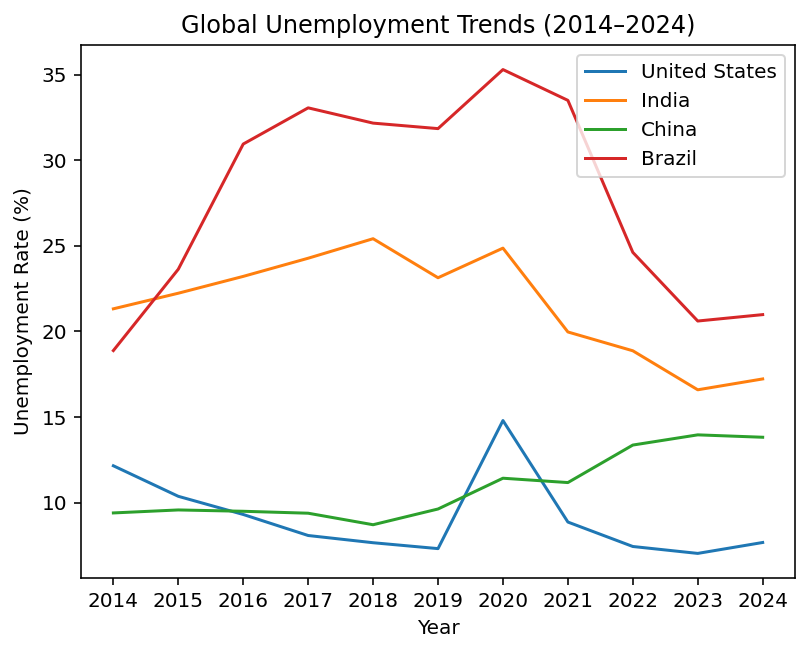

In [114]:
def plot_yearly_unemployment(df_unemp):
    """
    Plots unemployment trends for 4 countries (2014–2024)
    """
    plt.figure(dpi=144)
    for country in ['United States', 'India', 'China', 'Brazil']:
        data = df_unemp[df_unemp['country_name'] == country]
        plt.plot(years, data[years].values[0], label=country)
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%)')
    plt.legend()
    plt.title('Global Unemployment Trends (2014–2024)')
    plt.show()

plot_yearly_unemployment(df)

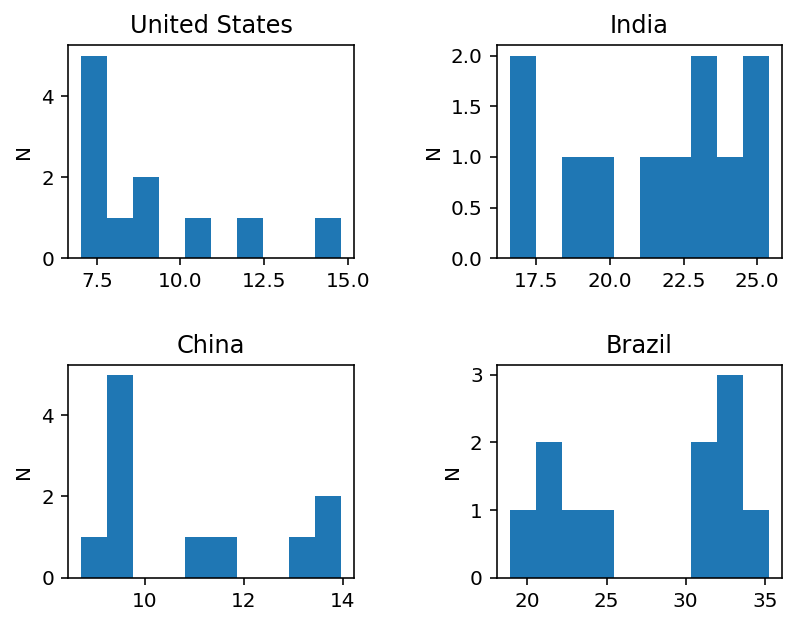

In [115]:
def plot_subplotted_unemployment(df):
    """
    Plots 4 histograms (US, India, China, Brazil) as subplots
    """
    fig, axs = plt.subplots(2, 2, dpi=144)
    axs = axs.flatten()

    usa = df[df['country_name']=='United States'][years].values[0]
    india = df[df['country_name']=='India'][years].values[0]
    china = df[df['country_name']=='China'][years].values[0]
    brazil = df[df['country_name']=='Brazil'][years].values[0]

    axs[0].hist(usa)
    axs[1].hist(india)
    axs[2].hist(china)
    axs[3].hist(brazil)

    for i, ax in enumerate(axs):
        ax.set_ylabel('N')
        ax.set_title(['United States','India','China','Brazil'][i])

    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

plot_subplotted_unemployment(df)

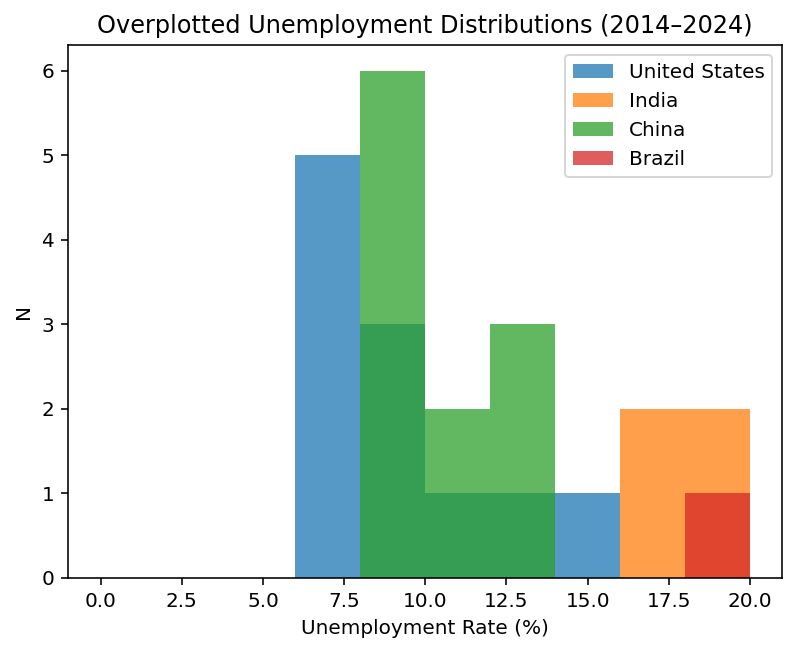

In [116]:
def plot_overplotted_unemployment(*dfs, labels=('United States', 'India', 'China', 'Brazil')):
    """
    Plots 4 unemployment histograms on top of each other (2014–2024)
    """
    plt.figure(dpi=144)
    for i, df in enumerate(dfs):
        plt.hist(df[years].values[0], label=labels[i], bins=10, range=(0, 20), alpha=0.75)
    plt.ylabel('N')
    plt.xlabel('Unemployment Rate (%)')
    plt.title('Overplotted Unemployment Distributions (2014–2024)')
    plt.legend()
    plt.show()

plot_overplotted_unemployment(usa, india, china, brazil)

In [117]:
def unemployment_boxplot(df):
    """
    Creates a box plot of unemployment rates for selected countries.
    Parameters:
        dataframe : pandas DataFrame containing unemployment data
    """
    plt.figure(dpi=144)

    data_to_plot = []

    for country in countries:
        subset = df[df['country_name'] == country]
        values = subset[years].values.flatten()
        data_to_plot.append(values)

    plt.boxplot(data_to_plot, labels=countries)
    plt.xlabel("Country")
    plt.ylabel("Unemployment Rate (%)")
    plt.title("Box Plot of Unemployment Rates (2014–2024)")
    plt.show()

C:\Users\jilani\AppData\Local\Temp\ipykernel_26668\4292432441.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries)


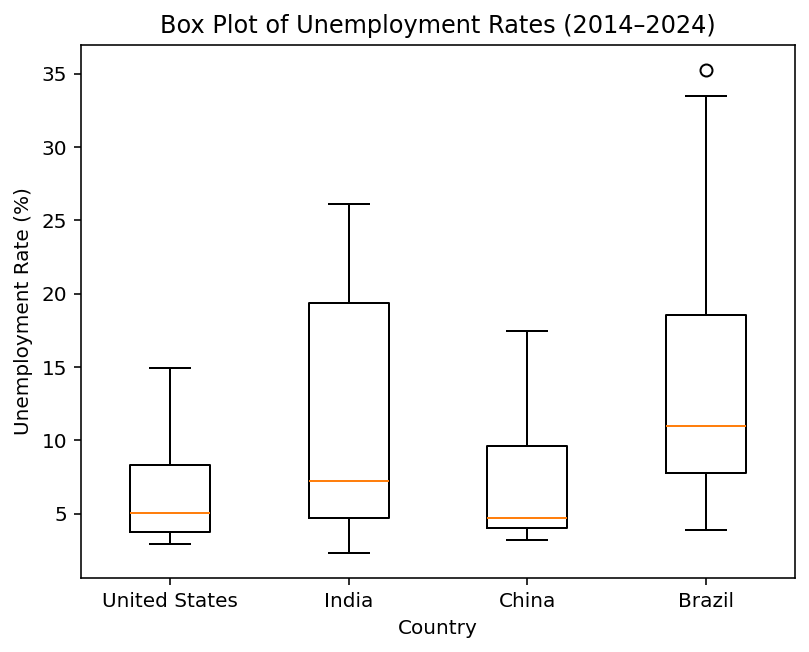

In [118]:
unemployment_boxplot(df)

In [121]:
# Calculate and print the 4 main statistical moments
for i, country in enumerate(countries):
    values = data_to_plot[i]
    mean_val = values.mean()
    var_val = values.var()
    skew_val = skew(values)
    kurt_val = kurtosis(values)
    
    print(country)
    print(" Mean:", round(mean_val, 2))
    print(" Variance:", round(var_val, 2))
    print(" Skewness:", round(skew_val, 2))
    print(" Kurtosis:", round(kurt_val, 2))
    print()


United States
 Mean: 6.29
 Variance: 10.19
 Skewness: 1.04
 Kurtosis: 0.25

India
 Mean: 10.89
 Variance: 65.65
 Skewness: 0.73
 Kurtosis: -1.19

China
 Mean: 6.82
 Variance: 16.16
 Skewness: 1.07
 Kurtosis: -0.13

Brazil
 Mean: 14.26
 Variance: 68.64
 Skewness: 0.99
 Kurtosis: -0.06

